<a href="https://colab.research.google.com/github/jgorthi/Linear-Regression-from-scratch/blob/main/CSE575_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression [10 pts]

In this homework, you will implement solution algorithms for linear regression.


## Import libraries
Let's begin by importing some libraries. 

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

Automatically created module for IPython interactive environment


## Load dataset

Now, we are importing a dataset of diabetes. You can check the details on this dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset. 

The dataset consists of 442 observations with 10 attributes ($X$) that may affect the progression of diabetes ($y$). Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n$ = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print('The shape of the input features:',diabetes_X.shape)
print('The shape of the output varaible:',diabetes_y.shape)

The shape of the input features: (442, 10)
The shape of the output varaible: (442,)


We will choose just one attribute from the ten attributes as an input variable.

In [ ]:
# Use only one feature
diabetes_X_one = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_one.shape)

(442, 1)


## Dataset split

Now, we split the dataset into two parts: training set and test set. 

- training set: 422 samples
- test set: 20 samples 

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_one[:-20]
diabetes_X_test = diabetes_X_one[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print('Training input variable shape:', diabetes_X_train.shape)
print('Test input variable shape:', diabetes_X_test.shape)

Training input variable shape: (422, 1)
Test input variable shape: (20, 1)


## Linear regression 

Assume that we have a hypothesis $$ h_{\theta}(x) = \theta_0 + \theta_1 x. $$

Your tasks: 

- [4pts] implement your own version of the method of least-squares, compute and report $\theta_0$ and $\theta_1$ that minimize the residual sum of squares, 
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

- [4pts] implement your own version of the gradient descent algorithm, compute and report $\theta_0$ and $\theta_1$ that minimize the mean squared error $$ \sum_{i=1}^{N} \frac{1}{N}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

- [2pts] derive the analytical expression of the gradient if the loss is defined as 
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2 + \frac{\lambda}{2} \| \theta \|_2^2, $$
where $\theta = [\theta_0, \theta_1]^{\intercal}$

To check whether your computation is correct, consider using an API such as Scikit learn linearregression.

In [ ]:
def rss(_theta0, _theta1):
    _sum = 0
    for i in range(0,len(diabetes_X_train)):
        _sum = _sum + ((diabetes_y_train[i].astype(float)) - _theta0 - (_theta1*(diabetes_X_train[i].astype(float)[0])))**2
    _sum = _sum/2
    return _sum

[0.06169621]


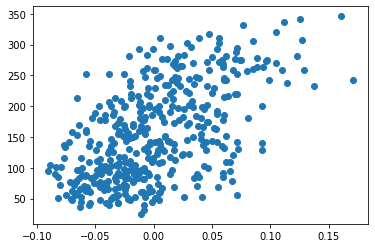

In [ ]:
plt.scatter(diabetes_X_train,diabetes_y_train)
#plt.show()
print(diabetes_X_train[0])
diabetes_X_train_O = np.c_[np.ones((422, 1)), diabetes_X_train]
#print(diabetes_X_train[0:5])
#print(diabetes_X_train.shape)

In [ ]:
_theta = np.linalg.inv(diabetes_X_train_O.transpose().dot(diabetes_X_train_O)).dot(diabetes_X_train_O.transpose()).dot(diabetes_y_train)
print(" ---- Least Squares Method -------")
print("Theta is ", _theta)
least_squares_theta = _theta

 ---- Least Squares Method -------
Theta is  [152.91886183 938.23786125]


In [ ]:
#print(diabetes_y_train[0:10])
#print(diabetes_X_train[0:10])

In [ ]:
import sys
def gradient(_theta0 = 1, _theta1 = 1, N = 0.1, iterations = 20000):
    _cost = sys.maxsize
    print(" ---- Gradient Descent Method -------")
    for i in range(iterations):
        _temp0 = 0
        _temp1 = 0
        for j in range(len(diabetes_X_train)):
            _temp = (diabetes_y_train[j].astype(float) - _theta0 - (_theta1 * diabetes_X_train[j].astype(float)[0]))
            _temp0 = _temp0 + _temp
            _temp1 = _temp1 + (_temp * diabetes_X_train[j].astype(float)[0])
        _temp0 = N*2*_temp0/len(diabetes_X_train)
        _temp1 = N*2*_temp1/len(diabetes_X_train)
        _theta0 = _theta0 + _temp0
        _theta1 = _theta1 + _temp1
        _cost = rss(_theta0, _theta1)
        if i % 1000 == 0:print("At iteration", i,"Cost is",_cost, "Theta0 is" , _theta0, "Theta1 is" , _theta1)
    return (_theta0, _theta1)
_theta_grad = gradient()
print("Finished gradient")

 ---- Gradient Descent Method -------
At iteration 0 Cost is 4388695.152737045 Theta0 is 31.472417267332766 Theta1 is 1.4389143636518207
At iteration 1000 Cost is 1003952.2537829212 Theta0 is 153.2011082022458 Theta1 is 342.754284765615
At iteration 2000 Cost is 902982.9456925979 Theta0 is 153.09828500755359 Theta1 is 559.6907236687623
At iteration 3000 Cost is 862180.1672467453 Theta0 is 153.03292060866025 Theta1 is 697.5965723384717
At iteration 4000 Cost is 845691.3276142889 Theta0 is 152.9913686547896 Theta1 is 785.2629099693012
At iteration 5000 Cost is 839028.0109780057 Theta0 is 152.9649542013608 Theta1 is 840.9921399311825
At iteration 6000 Cost is 836335.2933832534 Theta0 is 152.94816261191795 Theta1 is 876.4190455836418
At iteration 7000 Cost is 835247.1373731338 Theta0 is 152.93748824847617 Theta1 is 898.9398240865345
At iteration 8000 Cost is 834807.4018789025 Theta0 is 152.93070258740008 Theta1 is 913.2562159654044
At iteration 9000 Cost is 834629.7000575737 Theta0 is 152.

In [ ]:
def ridge(_theta0 = 1, _theta1 = 1, N = 0.1, iterations = 35000, _lambda = 0.00001):
    _cost = sys.maxsize
    print(" ---- Ridge Regression Method -------")
    print("For lambda" ,_lambda)
    for i in range(iterations):
        _temp0 = 0
        _temp1 = 0
        for j in range(len(diabetes_X_train)):
            _temp = (diabetes_y_train[j].astype(float) - _theta0 - (_theta1*diabetes_X_train[j].astype(float)[0]))
            _temp0 = _temp0 + _temp
            _temp1 = _temp1 + (_temp * diabetes_X_train[j].astype(float)[0])
        _temp0 = N*_temp0/len(diabetes_X_train) - (_lambda*_theta0)
        _temp1 = N*_temp1/len(diabetes_X_train) - (_lambda*_theta1)
        _theta0 = _theta0 + _temp0
        _theta1 = _theta1 + _temp1
        _cost =  rss(_theta0, _theta1)
        if i % 1000 == 0:print("At iteration", i,"Cost is",_cost, "Theta0 is" , _theta0, "Theta1 is" , _theta1)
    return (_theta0, _theta1)
_theta_rid = ridge()

 ---- Ridge Regression Method -------
For lambda 1e-05
At iteration 0 Cost is 5221590.457071662 Theta0 is 16.236198633666383 Theta1 is 1.2194471818259103
At iteration 1000 Cost is 1101848.3847207578 Theta0 is 153.2580527348359 Theta1 is 190.2592631681451
At iteration 2000 Cost is 1005846.9326561023 Theta0 is 153.1873469697254 Theta1 is 339.43432954206315
At iteration 3000 Cost is 945084.3815199531 Theta0 is 153.13153246094726 Theta1 is 457.19181421956375
At iteration 4000 Cost is 906478.5918003682 Theta0 is 153.087472978877 Theta1 is 550.148536375891
At iteration 5000 Cost is 881835.868756919 Theta0 is 153.0526928114476 Theta1 is 623.5277548409684
At iteration 6000 Cost is 866017.4802028892 Theta0 is 153.02523765333902 Theta1 is 681.4526641712526
At iteration 7000 Cost is 855795.2930985781 Theta0 is 153.00356479312936 Theta1 is 727.1780778661207
At iteration 8000 Cost is 849137.2162331702 Theta0 is 152.98645642799772 Theta1 is 763.2733170601088
At iteration 9000 Cost is 844760.77919925

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(diabetes_X_train,diabetes_y_train)
print(regressor.intercept_)
print(regressor.coef_)
print("Theta from Sklearn",(regressor.intercept_,regressor.coef_[0]))
print("Theta from Least Squares Method",least_squares_theta)
print("Theta from Gradient Descent Method",_theta_grad)
print("Theta from Ridge Regression Method",_theta_rid)

152.91886182616167
[938.23786125]
Theta from Sklearn (152.91886182616167, 938.2378612512637)
Theta from Least Squares Method [152.91886183 938.23786125]
Theta from Gradient Descent Method (152.91891341770454, 938.1290133826878)
Theta from Ridge Regression Method (152.92244003376723, 898.3351446696498)
